In [38]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md


In [3]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [4]:
df = pd.read_csv('./data/2 DONE RIGHT OUTPUT Songs with lyrics.csv')
df

,song_id,chart_position,chart_debut,song,performer,lyrics
0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]\nSo long ago\nWas it ...
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,4,2002-10-26,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,"’03 Bonnie & Clyde Lyrics[Intro: JAY-Z]\nUhh, ..."
2,'65 Love AffairPaul Davis,6,1982-02-27,'65 Love Affair,Paul Davis,’65 Love Affair LyricsI was a car hop\nYou wer...
3,('til) I Kissed YouThe Everly Brothers,4,1959-08-15,('til) I Kissed You,The Everly Brothers,(’Til) I Kissed You Lyrics[Verse]\nNever felt ...
4,(Can't Live Without Your) Love And AffectionNe...,1,1990-07-07,(Can't Live Without Your) Love And Affection,Nelson,(Can’t Live Without Your) Love And Affection L...
...,...,...,...,...,...,...
4455,amariJ. Cole,5,2021-05-29,amari,J. Cole,"4:44 Lyrics[Paroles de ""4:44"" par. ""Apollonthe..."
4456,everything i wantedBillie Eilish,8,2019-11-23,everything i wanted,Billie Eilish,​everything i wanted Lyrics[Verse 1]\nI had a ...
4457,iSpyKYLE Featuring Lil Yachty,4,2017-01-14,iSpy,KYLE Featuring Lil Yachty,"​iSpy Lyrics[Intro: KYLE & Lil Yachty]\nMan, f..."
4458,interludeJ. Cole,8,2021-05-22,interlude,J. Cole,Once an Addict (Interlude) Lyrics[Intro]\nRigh...


In [5]:
df[df.song.str.contains('Rolling in the Deep', case=False)].lyrics.iloc[0]

"Rolling in the Deep Lyrics[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out and I'll lay your shit bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could've had it all (You're gonna wish you never had met me)\nRolling in the deep (Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand (You're gonna wish you never had met me)\nAnd you played it to the beat (Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on you, now I'm gonna make your head burn\nThink 

# Explode data into *one row per line*

In [6]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'song_id']
).drop(
    columns=['lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'}).reset_index()


In [7]:
every_row_is_a_line_RAW

,index,song_id,chart_position,chart_debut,song,performer,lyric_line
0,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,#9 Dream Lyrics[Verse 1]
1,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,So long ago
2,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Was it in a dream, was it just a dream?"
3,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"I know, yes I know"
4,0,#9 DreamJohn Lennon,9,1974-12-21,#9 Dream,John Lennon,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...
318985,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","YG - ""Sign Language"""
318986,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Yung Miami - ""Rap Freaks"""
318987,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray",10/30
318988,4459,"my.lifeJ. Cole, 21 Savage & Morray",2,2021-05-29,my.life,"J. Cole, 21 Savage & Morray","Now United - ""Future Me"""


### Filter & clean

In [8]:
# doesn't need to be regex
BRACKETED = '^\[.*?\]$'  # eg "[...]"
# SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"
SONG_DASH_ARTIST = ' - '  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

# regex is easiest
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"


with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        ENDS_WITH_YEAR_IN_PAREN, 
        regex= True, case=False, na=False
    )
]

with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        BRACKETED, 
        regex= True, case=False, na=False
    )
]

with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        SONG_DASH_ARTIST
    )
]

In [11]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
].reset_index()

In [41]:
MIN_CHAR_COUNT_FOR_A_LINE = 6

In [45]:
md(f'### note: we are just going to look at lyric lines of {MIN_CHAR_COUNT_FOR_A_LINE}+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)')

### note: we are just going to look at lyric lines of 6+ characters. So lines like "yeah" will not count. (this also removes a lot of noise)

In [46]:
with_even_more_filters = with_more_filters[
    (with_more_filters.lyric_line.str.len() >= MIN_CHAR_COUNT_FOR_A_LINE)
]

# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [48]:
COLUMNS_FOR_VIZ = ['performer', 'song', 'lyric_line', 'chart_debut']

lyric_lines_ready_for_analysis = (
    with_even_more_filters[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val and val.replace('â\x80\x99', "'")
)
lyric_lines_ready_for_analysis

,performer,song,lyric_line,chart_debut
0,John Lennon,#9 Dream,#9 Dream Lyrics[Verse 1],1974-12-21
1,John Lennon,#9 Dream,So long ago,1974-12-21
2,John Lennon,#9 Dream,"Was it in a dream, was it just a dream?",1974-12-21
3,John Lennon,#9 Dream,"I know, yes I know",1974-12-21
4,John Lennon,#9 Dream,"Seemed so very real, it seemed so real to me",1974-12-21
...,...,...,...,...
290735,"J. Cole, 21 Savage & Morray",my.life,October 2021 Singles Release Calendar Lyrics10/1,2021-05-29
290736,"J. Cole, 21 Savage & Morray",my.life,"Queens Cast, Eve, Naturi Naughton, Nadine Vela...",2021-05-29
290737,"J. Cole, 21 Savage & Morray",my.life,"- ""Belly of the Bitch""",2021-05-29
290738,"J. Cole, 21 Savage & Morray",my.life,"Queens Cast, Brandy, Nadine Velazquez, Eve & N...",2021-05-29


### Lyric lines by year (sanity check)

<AxesSubplot:>

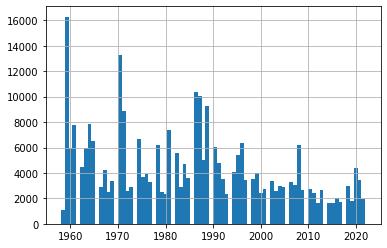

In [54]:
lyric_lines_ready_for_analysis.chart_debut.apply(lambda d: int(d[:4])).hist(bins=80)

In [55]:
lyric_lines_ready_for_analysis.to_csv('./data/3 DONE RIGHT OUTPUT One lyric lines per row, cleaned.csv', index=False)